# Clustering

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.clustering import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [31]:
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


### Exploratory Data Analysis

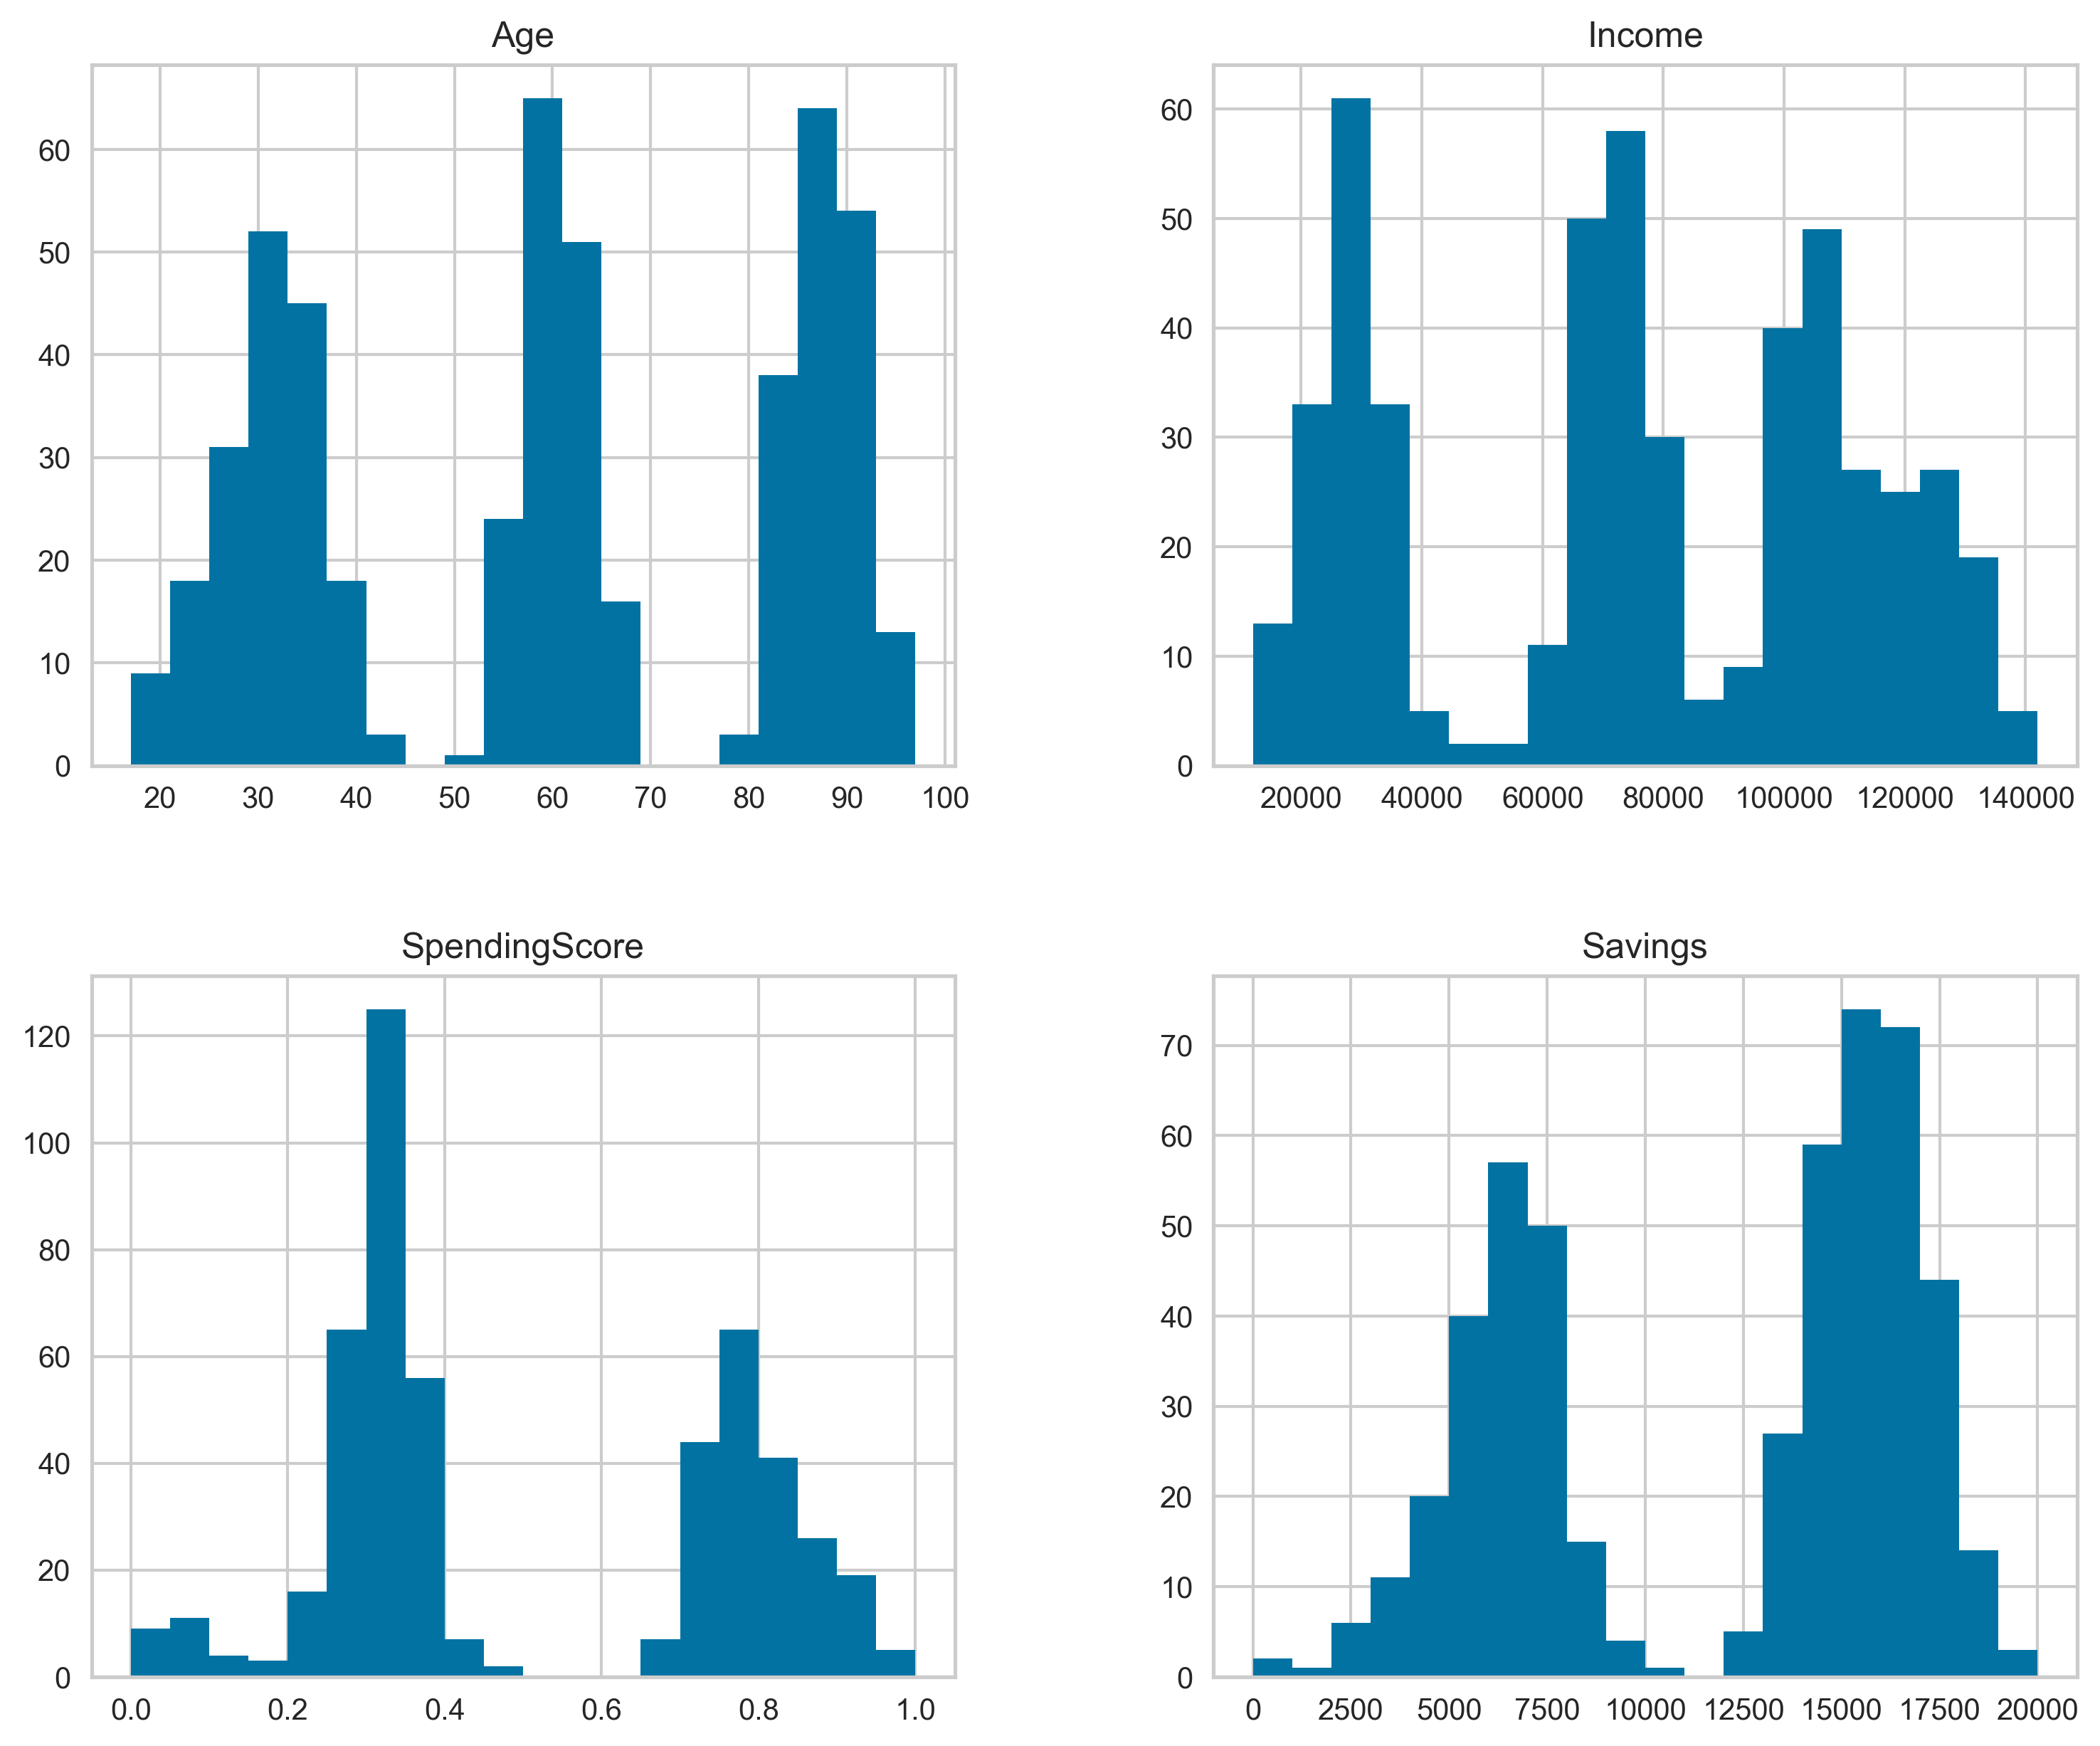

Age             -0.060619
Income          -0.141910
SpendingScore    0.247686
Savings         -0.363895
dtype: float64

In [72]:
data.hist(bins = 20, figsize = (12,10))
plt.show()

data.skew()

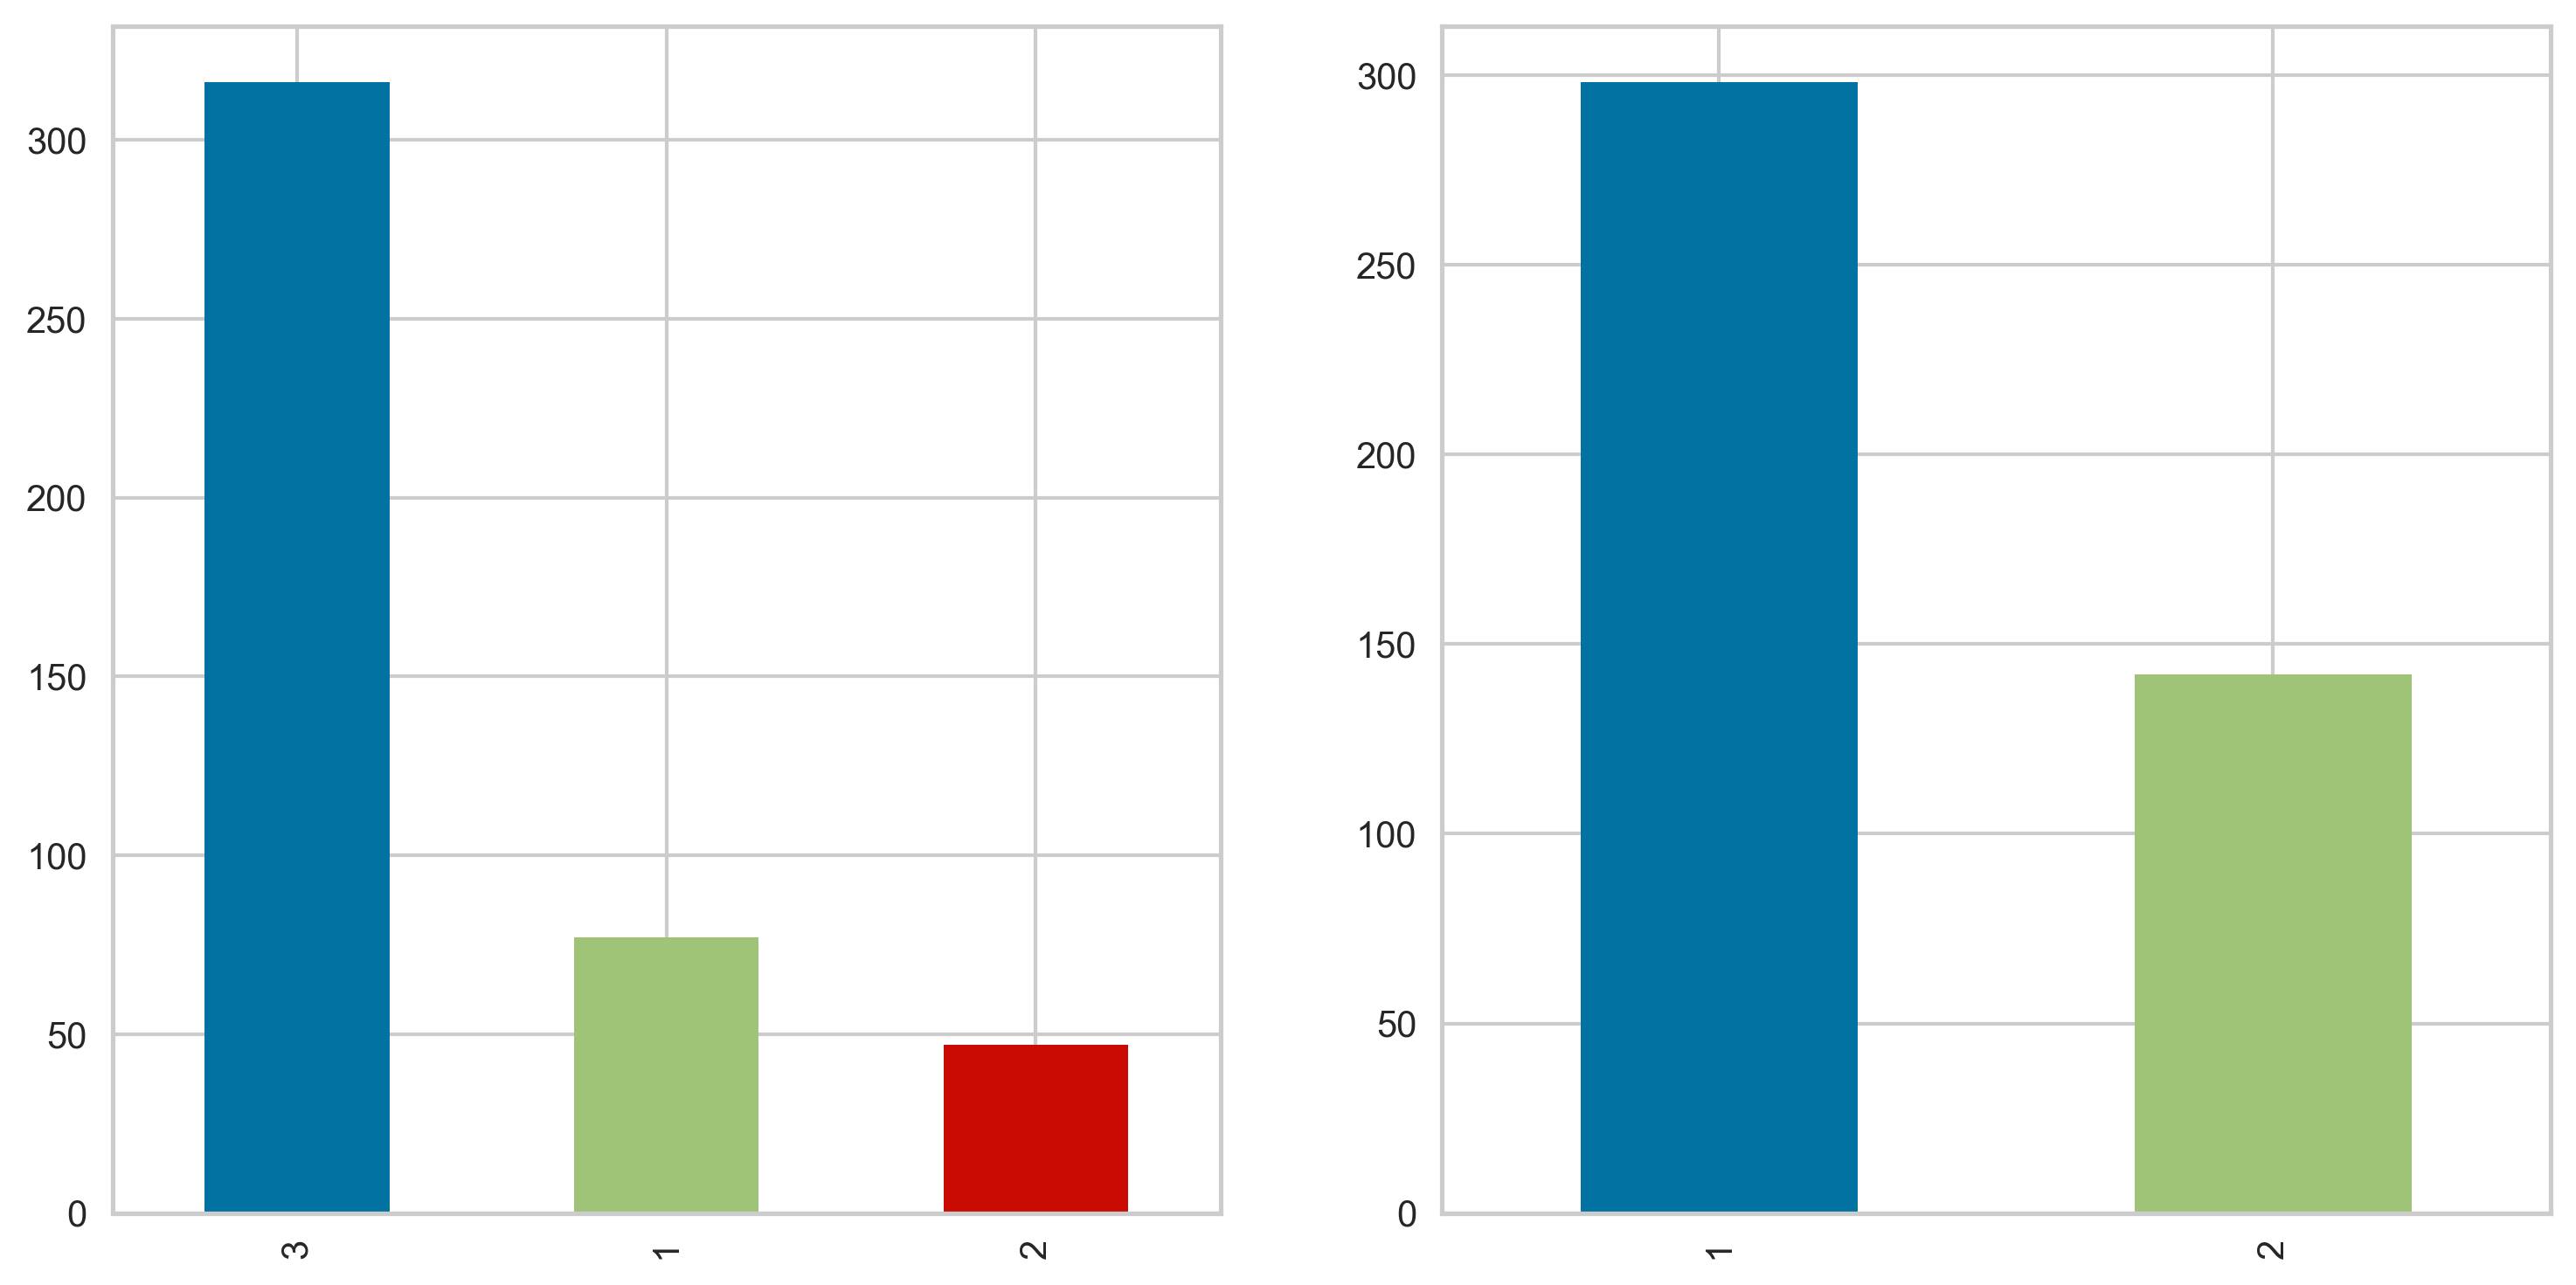

In [60]:
color = ['C0', 'C1', 'C2', 'C3']

fig, ax = plt.subplots(1, 2, figsize=(12,6))

data['Region'].value_counts().plot(kind='bar', color=color, ax=ax[0])
data['Channel'].value_counts().plot(kind='bar', color=color, ax=ax[1])

ax[0].set_label('Region')
ax[1].set_label('Channel')

plt.show()

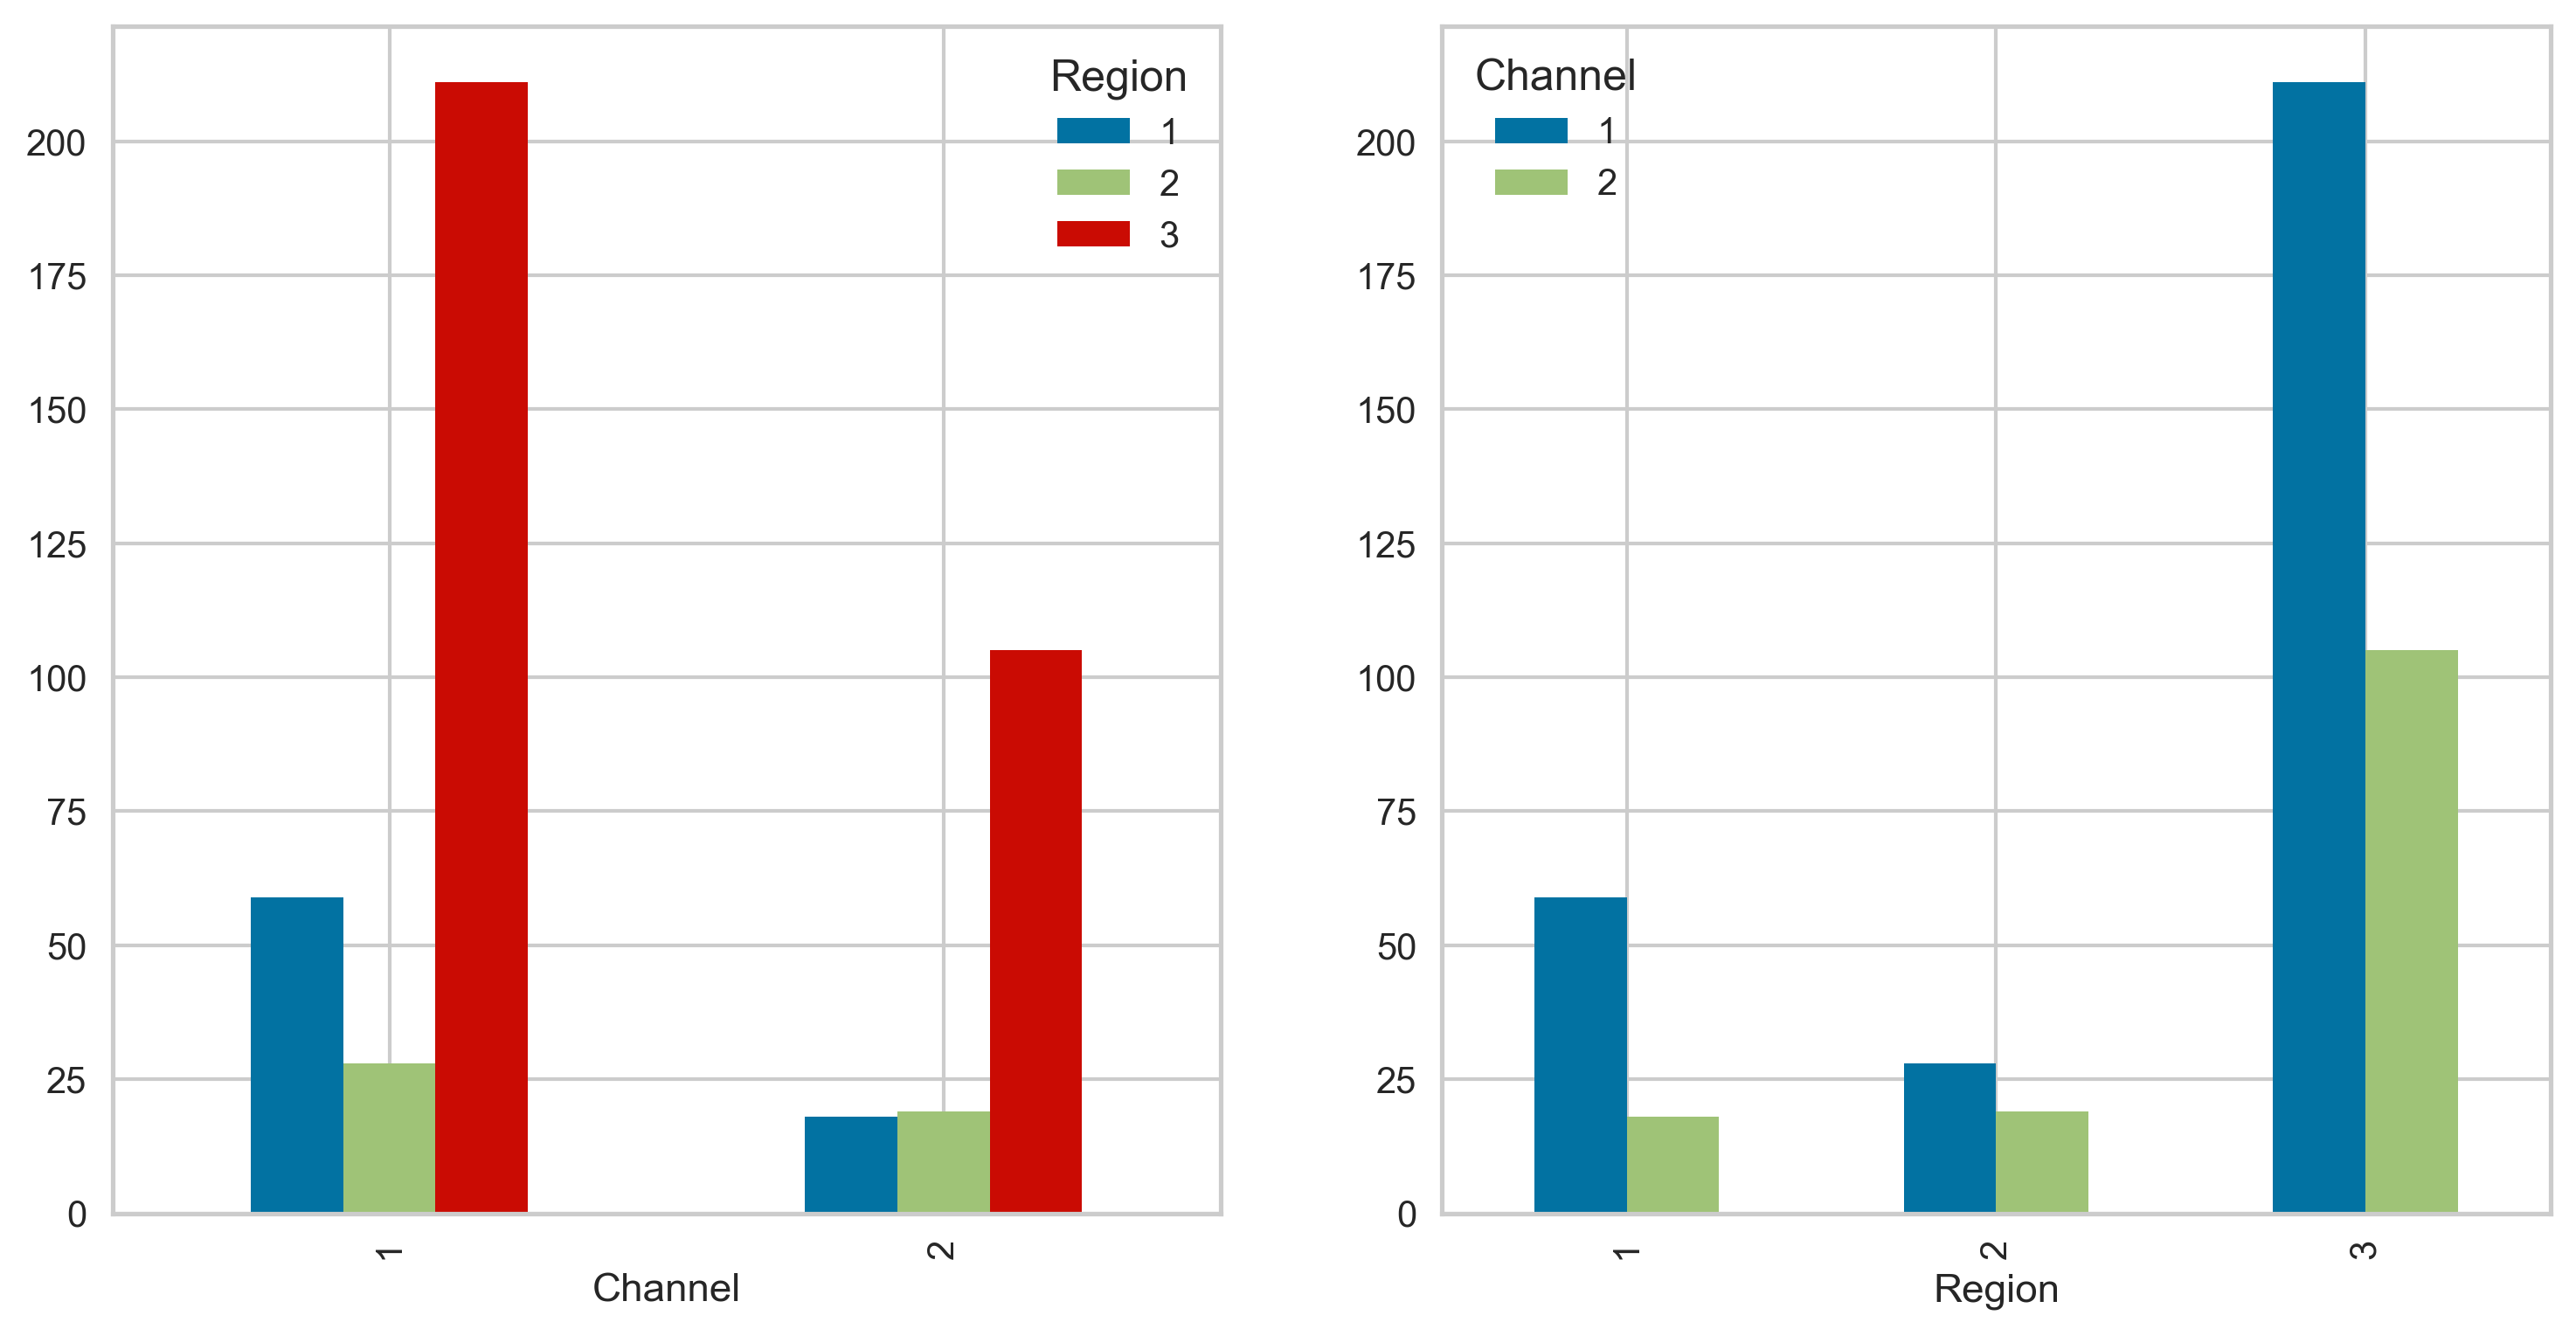

In [47]:
cat = data[categorical]

fig, ax = plt.subplots(1, 2, figsize=(12,6))

cat.groupby(categorical).size().unstack().plot(kind = 'bar', ax=ax[0])
cat.groupby(categorical[::-1]).size().unstack().plot(kind = 'bar', ax=ax[1])
plt.show()

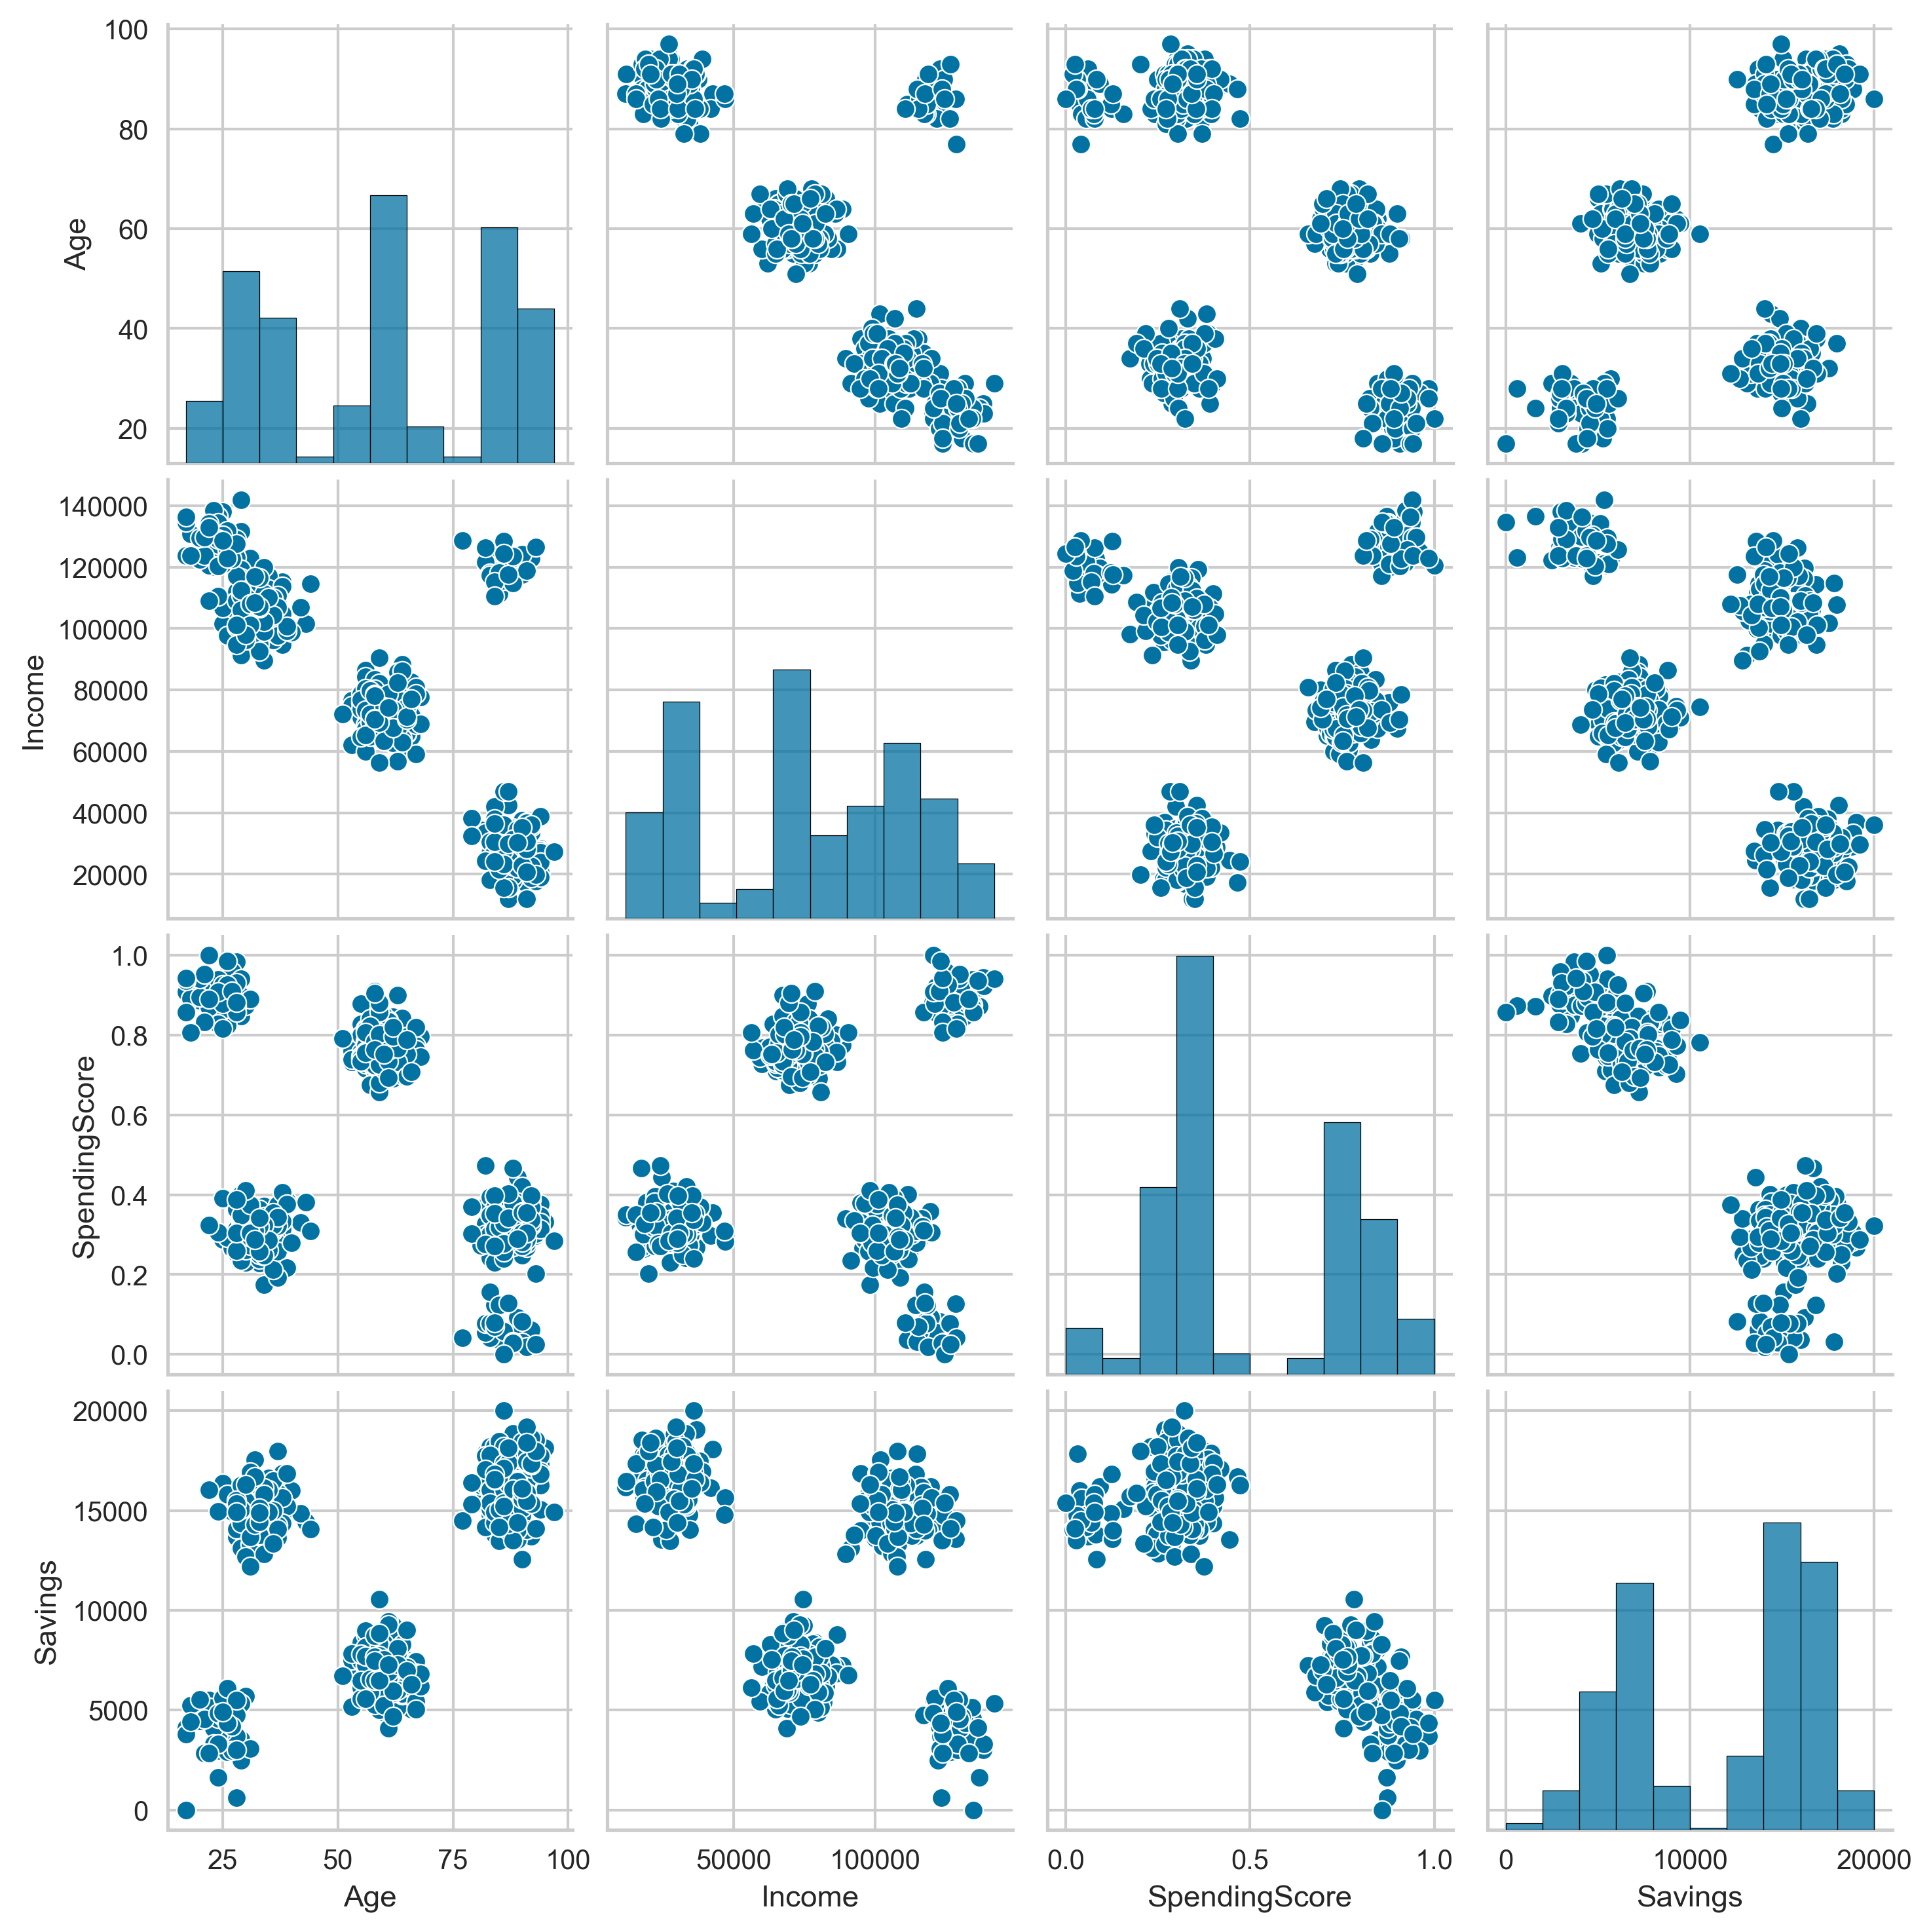

In [85]:
sns.pairplot(data, palette = 'tab10')

plt.show()

### Initializing the PyCaret Environment

In [76]:
cluster = setup(data)

,Description,Value
0,session_id,6299
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


### Creating a Model

In [82]:
model = create_model('kmeans', 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5361,0.3435,0,0,0


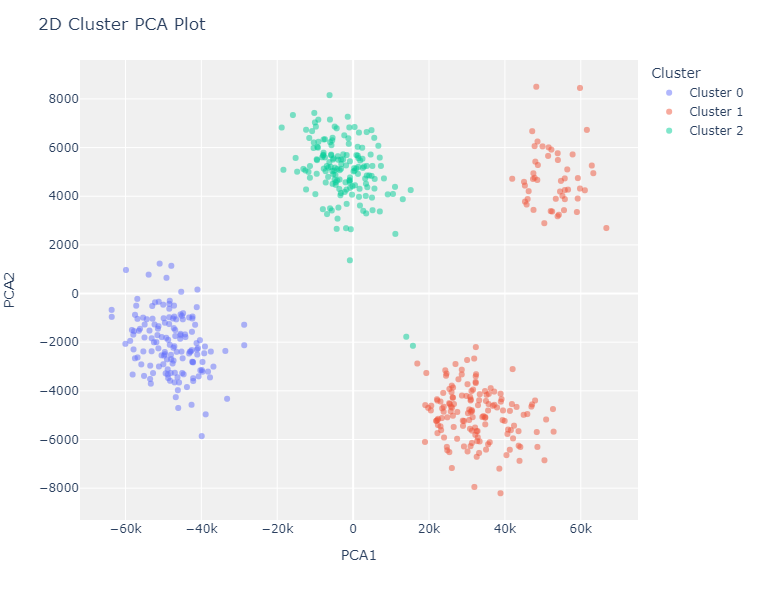

In [83]:
plot_model(model)

### Plotting the Model

### Finalizing and Saving the Model